In [1]:
from funcs.base import *

import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib. pyplot as plt
%matplotlib inline
sns.set(style="ticks")


from sklearn.metrics import *
from sklearn.neighbors import *
from sklearn.tree import *
from sklearn.linear_model import *
from sklearn.svm import *
from sklearn.ensemble import *

from sklearn.preprocessing import MinMaxScaler

# 1. Описание

In [2]:
database = pd.read_csv('epi_r.csv', sep=",")

In [3]:
database.shape, database.shape[0] * database.shape[1]

((20052, 680), 13635360)

In [4]:
pd.set_option('display.max_columns', None)
database

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

# 2. Минимизация
### 2.1. Удаление строк

In [5]:
# Удаление пустых строк
buff = database.dropna(axis=0)
buff.shape

(15864, 680)

### 2.2. Формирование фреймов по уникальным значениям y

In [6]:
# Уникальные значения поля rating
l = np.unique(buff[['rating']])
print(f'Количество уникальных значений поля rating : {len(l)}\n{l}' )

Количество уникальных значений поля rating : 8
[0.    1.25  1.875 2.5   3.125 3.75  4.375 5.   ]


In [7]:
# Выбираем все уникальные строки с определенным rating
arrgroup = []
for i in l:
    arrgroup.append(buff[buff['rating'] == i])

In [8]:
# Узнаем размерность каждого dataframe
for i in arrgroup:
    print(i.shape)

(1296, 680)
(123, 680)
(81, 680)
(405, 680)
(1165, 680)
(4136, 680)
(6552, 680)
(2106, 680)


### 2.3. Выборка из каждого dataframe n% строк и добавляем в нывую таблицу

In [9]:
# В данной ситуации выбираем 33% строк
m_frac = 0.09

In [10]:
# Новый фрейм
newdata = pd.DataFrame()

In [11]:
# Осуществляем выборку по каждому диапазону
for i in arrgroup:
    newdata = newdata.append(i.sample(frac = m_frac))

In [12]:
newdata.shape

(1428, 680)

In [13]:
newdata

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,bell pepper,berry,beverly hills,birthday,biscuit,bitters,blackberry,blender,blue cheese,blueberry,boil,bok choy,bon appétit,bon app��tit,boston,bourbon,braise,bran,brandy,bread,breadcrumbs,breakfast,brie,brine,brisket,broccoli,broccoli rabe,broil,brooklyn,brown rice,brownie,brunch,brussel sprout,buffalo,buffet,bulgaria,bulgur,burrito,butter,buttermilk,butternut squash,butterscotch/caramel,cabbage,cake,california,calvados,cambridge,campari,camping,canada,candy,candy thermometer,cantaloupe,capers,caraway,cardamom,carrot,cashew,casserole/gratin,cauliflower,caviar,celery,chambord,champagne,chard,chartreuse,cheddar,cheese,cherry,chestnut,chicago,chicken,chickpea,chile,chile pepper,chili,chill,chive,chocolate,christmas,christmas eve,cilantro,cinco de mayo,cinnamon,citrus,clam,clove,cobbler/crumble,cocktail,cocktail party,coconut,cod,coffee,coffee grinder,cognac/armagnac,collard greens,colorado,columbus,condiment,condiment/spread,connecticut,cook like a diner,cookbook critic,cookie,cookies,coriander,corn,cornmeal,costa mesa,cottage cheese,couscous,crab,cranberry,cranberry sauce,cream cheese,créme de cacao,crêpe,cr��me de cacao,cuba,cucumber,cumin,cupcake,currant,curry,custard,dairy,dairy free,dallas,date,deep-fry,denver,dessert,digestif,dill,dinner,dip,diwali,dominican republic,dorie greenspan,double boiler,dried fruit,drink,drinks,duck,easter,eau de vie,edible gift,egg,egg nog,eggplant,egypt,emeril lagasse,endive,engagement party,england,entertaining,epi + ushg,epi loves the microwave,escarole,fall,family reunion,fat free,father's day,fennel,feta,fig,fish,flaming hot summer,flat bread,florida,fontina,food processor,fortified wine,fourth of july,france,frangelico,frankenrecipe,freeze/chill,freezer food,friendsgiving,frittata,fritter,frozen dessert,fruit,fruit juice,fry,game,garlic,georgia,germany,gin,ginger,goat cheese,goose,gouda,gourmet,graduation,grains,grand marnier,granola,grape,grapefruit,grappa,green bean,green onion/scallion,grill,grill/barbecue,ground beef,ground lamb,guam,guava,haiti,halibut,halloween,ham,hamburger,hanukkah,harpercollins,hawaii,hazelnut,healdsburg,healthy,herb,high fiber,hollywood,hominy/cornmeal/masa,honey,honeydew,hors d'oeuvre,horseradish,hot drink,hot pepper,house & garden,house cocktail,houston,hummus,ice cream,ice cream machine,iced coffee,iced tea,idaho,illinois,indiana,iowa,ireland,israel,italy,jalapeño,jam or jelly,jamaica,japan,jerusalem artichoke,juicer,jícama,kahlúa,kale,kansas,kansas city,kentucky,kentucky derby,kid-friendly,kidney friendly,kirsch,kitchen olympics,kiwi,kosher,kosher for passover,kumquat,kwanzaa,labor day,lamb,lamb chop,lamb shank,lancaster,las vegas,lasagna,leafy green,leek,legume,lemon,lemon juice,lemongrass,lentil,lettuce,lima bean,lime,lime juice,lingonberry,liqueur,lobster,london,long beach,los angeles,louisiana,louisville,low cal,low carb,low cholesterol,low fat,low sodium,low sugar,low/no sugar,lunar new year,lunch,lychee,macadamia nut,macaroni and cheese,maine,mandoline,mango,maple syrup,mardi gras,margarita,marinade,marinate,marsala,marscarpone,marshmallow,martini,maryland,massachusetts,mayonnaise,meat,meatball,meatloaf,melon,mexico,mezcal,miami,michigan,microwave,midori,milk/cream,minneapolis,minnesota,mint,mississippi,missouri,mixer,molasses,monterey jack,mortar and pestle,mother's day,mozzarella,muffin,mushroom,mussel,mustard,mustard greens,nancy silverton,nebraska,nectarine,new hampshire,new jersey,new mexico,new orleans,new year's day,new year's eve,new york,"no meat, no problem",no sugar a

### 2.4. Делаем корреляцию данных и выясняем какие столбцы не влияют на таблицу

In [14]:
corr = newdata.corr()

In [15]:
# Сумма пропущенных значений
isnull = corr.isnull().sum()
summNan = isnull.to_dict()

keys = []
index = 0
# Если значение пропусков больше половины, то запоминае удаляемый столбец
for key, val in summNan.items():
    if val >= buff.shape[1] / 2:
        keys.append(key)

In [16]:
#isnull.to_dict()

### 2.5 Производим удаление ненужных столбцов

In [17]:
for i in keys:
    newdata = newdata.drop([i], axis = 1)

In [18]:
newdata.shape

(1428, 519)

# Формирование данных

In [19]:
x = newdata.drop(['rating','title'], axis = 1)
y = newdata[['rating']]
mm = MinMaxScaler()
x=pd.DataFrame(mm.fit_transform(x))
y=pd.DataFrame(mm.fit_transform(y))

# Будем рассматривать данную задачу со стороны классификации

In [20]:
from sklearn.utils.multiclass import type_of_target
from sklearn.preprocessing import LabelEncoder
type_of_target(y)

'continuous'

In [21]:
one = LabelEncoder()
y = one.fit_transform(y.values.ravel())

In [22]:
type_of_target(y)

'multiclass'

In [23]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [24]:
y = pd.DataFrame(y)

# Формирование моделей для решения задачи регрессии

In [25]:
metrics = [accuracy_score, balanced_accuracy_score]

models = [
    {
        'model': BaggingClassifier(n_estimators=5, random_state=10),
        'grid': {
            'n_estimators': np.arange(1, 5, 1),
            'random_state': np.arange(1, 5, 1)
        },
        'metrics': metrics
    },
    {
        'model': AdaBoostClassifier(n_estimators=5, random_state=10),
        'grid': {
            'n_estimators': np.arange(1, 5, 1),
            'random_state': np.arange(1, 5, 1)
        },
        'metrics': metrics
    }
]

In [26]:
BasesModels = Analysing(models)

# Обучение моделей без подбора параметров

In [27]:
m1 = BasesModels.run(x, y, test_size=0.25)

C:\Users\Vantus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vantus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\Vantus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Vantus\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1850: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains cl

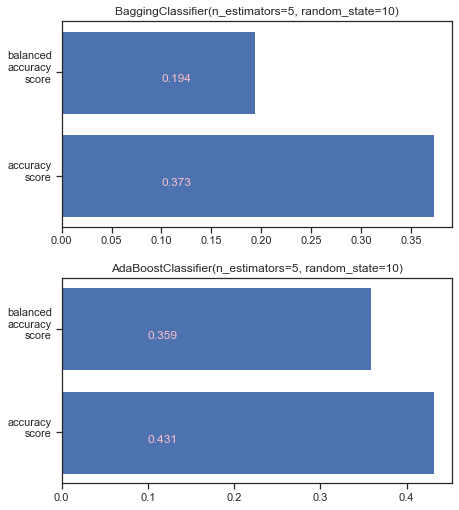

In [28]:
m1.plot(space=0.25)

# Обучение моделей с подбора параметров


In [29]:
m2 = BasesModels.run(x, y, test_size=0.5, cross=True)

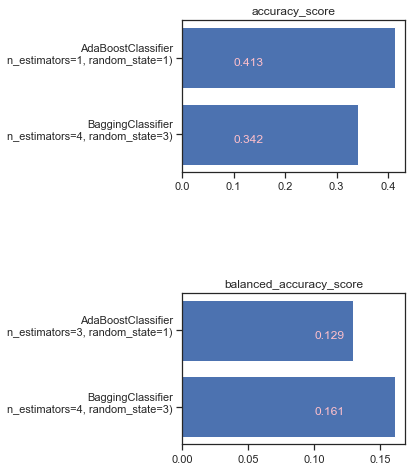

In [30]:
m2.plot_cross(space=0.8)

# TPOT AutoML

In [31]:
# from tpot import *
# from sklearn.model_selection import train_test_split

# Деление выборки

In [32]:
# train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=1)

# Создание экземпляра

In [33]:
# tp = TPOTClassifier()

In [1]:
# tp.fit(train_x, train_y)

# Формирование выводов о качестве построенных моделей на основе выбранных метрик.

# Web отчет